In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt 


In [ ]:
df = pd.read_csv("/content/bitcoin_price_bitcoin_price.2013Apr-2017Aug.csv")

In [ ]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:
df = df.drop(['Date'], axis = 1)
df

,Open,High,Low,Close,Volume,Market Cap
0,2763.24,2889.62,2720.61,2875.34,"86,05,75,000","45,53,58,00,000"
1,2724.39,2758.53,2644.85,2757.18,"70,59,43,000","44,89,07,00,000"
2,2807.02,2808.76,2692.80,2726.45,"80,37,46,000","46,24,67,00,000"
3,2679.73,2897.45,2679.73,2809.01,"1,38,01,00,000","44,14,44,00,000"
4,2538.71,2693.32,2529.34,2671.78,"78,91,04,000","41,81,65,00,000"
...,...,...,...,...,...,...
1551,116.38,125.60,92.28,105.21,-,"1,29,21,90,000"
1552,139.00,139.89,107.72,116.99,-,"1,54,28,20,000"
1553,144.00,146.93,134.05,139.00,-,"1,59,77,80,000"
1554,134.44,147.49,134.00,144.54,-,"1,49,11,60,000"


In [ ]:
df = df.drop(df.index[1313:1557])

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df['Volume'] = df['Volume'].str.replace(',', '').astype(int)

In [ ]:
df['Market Cap'] = df['Market Cap'].str.replace(',', '').astype(int)

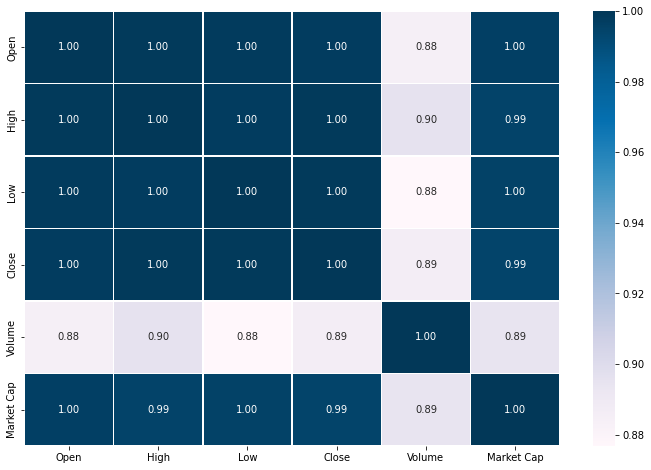

In [ ]:
f,ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), cmap="PuBu", annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()

In [ ]:
df = preprocessing.scale(df)
df

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


array([[ 3.96033495,  4.00947518,  4.0434646 ,  4.1427122 ,  2.1976107 ,
         3.98663196],
       [ 3.88769614,  3.77366608,  3.89690645,  3.92308346,  1.72060928,
         3.91473493],
       [ 4.04219151,  3.8640215 ,  3.98966599,  3.86596437,  2.02230731,
         4.06586245],
       ...,
       [ 0.15508941,  0.1581544 ,  0.16251729,  0.18305651, -0.39840486,
        -0.09951737],
       [ 0.17365578,  0.15536621,  0.14493264,  0.151049  , -0.35677767,
        -0.0863383 ],
       [ 0.22095982,  0.21014069,  0.16089231,  0.16450628, -0.31249019,
        -0.05237696]])

In [ ]:
df = pd.DataFrame(df)
df

,0,1,2,3,4,5
0,3.960335,4.009475,4.043465,4.142712,2.197611,3.986632
1,3.887696,3.773666,3.896906,3.923083,1.720609,3.914735
2,4.042192,3.864021,3.989666,3.865964,2.022307,4.065862
3,3.804194,4.023560,3.964382,4.019422,3.800217,3.831559
4,3.540526,3.656364,3.673452,3.764347,1.977140,3.572112
...,...,...,...,...,...,...
1308,0.215425,0.179686,0.208423,0.199711,-0.392587,-0.055423
1309,0.179957,0.190515,0.212428,0.203651,-0.393172,-0.081195
1310,0.155089,0.158154,0.162517,0.183057,-0.398405,-0.099517
1311,0.173656,0.155366,0.144933,0.151049,-0.356778,-0.086338


In [ ]:
X = df.drop([3], axis = 1)
X

,0,1,2,4,5
0,3.960335,4.009475,4.043465,2.197611,3.986632
1,3.887696,3.773666,3.896906,1.720609,3.914735
2,4.042192,3.864021,3.989666,2.022307,4.065862
3,3.804194,4.023560,3.964382,3.800217,3.831559
4,3.540526,3.656364,3.673452,1.977140,3.572112
...,...,...,...,...,...
1308,0.215425,0.179686,0.208423,-0.392587,-0.055423
1309,0.179957,0.190515,0.212428,-0.393172,-0.081195
1310,0.155089,0.158154,0.162517,-0.398405,-0.099517
1311,0.173656,0.155366,0.144933,-0.356778,-0.086338


In [ ]:
# spliting the data into train and test sets

X = df.drop([3], axis = 1)
Y = df.iloc[:,3]

train_ratio = 0.70
test_ratio = 0.30

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 1-train_ratio, random_state = 1)

print(x_train, x_test, y_train, y_test)


             0         1         2         4         5
306  -0.072662 -0.097316 -0.049949 -0.306753 -0.014600
1118 -0.037174 -0.060602 -0.015148 -0.426760 -0.182797
994  -0.528837 -0.514232 -0.527869 -0.363119 -0.543996
1154  0.028883  0.024141  0.039367 -0.331643 -0.142523
1082 -0.184957 -0.205876 -0.254775 -0.346604 -0.288695
...        ...       ...       ...       ...       ...
715  -0.716539 -0.716385 -0.722326 -0.365380 -0.665161
905  -0.789907 -0.774199 -0.788931 -0.390406 -0.745761
1096 -0.145338 -0.133922 -0.127523 -0.387742 -0.261203
235   0.229935  0.205086  0.262164 -0.209925  0.283863
1061 -0.313034 -0.299973 -0.296638 -0.376595 -0.384330

[919 rows x 5 columns]              0         1         2         4         5
201   0.491771  0.465467  0.255993  0.502089  0.540557
115   0.998130  0.945990  1.031014  0.520884  1.047971
255   0.178760  0.165835  0.205947 -0.187556  0.231871
1040 -0.414971 -0.426628 -0.427449 -0.374334 -0.460656
195   0.347484  0.449476  0.387616  0.021

In [ ]:
Y

0       4.142712
1       3.923083
2       3.865964
3       4.019422
4       3.764347
          ...   
1308    0.199711
1309    0.203651
1310    0.183057
1311    0.151049
1312    0.164506
Name: 3, Length: 1313, dtype: float64

In [ ]:
x_train

,0,1,2,4,5
306,-0.072662,-0.097316,-0.049949,-0.306753,-0.014600
1118,-0.037174,-0.060602,-0.015148,-0.426760,-0.182797
994,-0.528837,-0.514232,-0.527869,-0.363119,-0.543996
1154,0.028883,0.024141,0.039367,-0.331643,-0.142523
1082,-0.184957,-0.205876,-0.254775,-0.346604,-0.288695
...,...,...,...,...,...
715,-0.716539,-0.716385,-0.722326,-0.365380,-0.665161
905,-0.789907,-0.774199,-0.788931,-0.390406,-0.745761
1096,-0.145338,-0.133922,-0.127523,-0.387742,-0.261203
235,0.229935,0.205086,0.262164,-0.209925,0.283863


In [ ]:
y_train

306    -0.077762
1118   -0.040996
994    -0.519789
1154    0.039116
1082   -0.261331
          ...   
715    -0.721295
905    -0.778470
1096   -0.112130
235     0.230938
1061   -0.291647
Name: 3, Length: 919, dtype: float64

# **1) Decision Tree Regressor**

In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(" The mean_squared_error for Decision Tree Regressor is -->",mean_squared_error(y_test, y_pred))

 The mean_squared_error for Decision Tree Regressor is --> 0.003985419054619389


mse_hyper0 : [0.08433446080727673, 0.021215536305900187, 0.006617818165460342, 0.004369631285249092, 0.003956373325187105, 0.003707223921171583, 0.0038242515806609055, 0.003805518513290297]


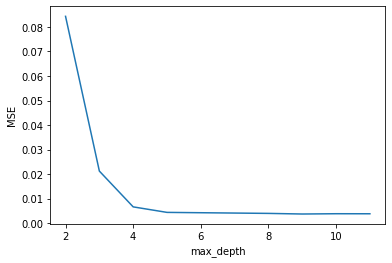

mse_hyper1 : [0.004099082574976993, 0.003973164565162418, 0.003837219081517447, 0.0041329699003278385, 0.003822249391972201, 0.004265610448021508]


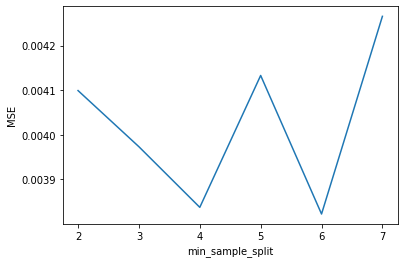

mse_hyper2 : [0.003914106815844885, 0.001840790367021573, 0.002515902996056321, 0.0027490147883807016, 0.0042567388498637275, 0.00452332186346501, 0.00447196277492199, 0.004247277473185327, 0.00500246504857709]


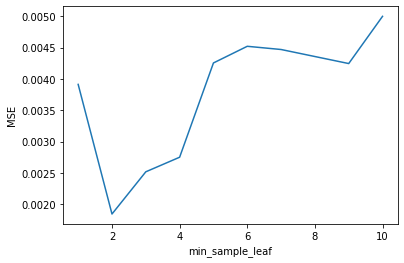

mse_hyper3 : [0.12926919746295198, 0.31173954142024535, 0.4170396934908335, 0.5038582792825117]


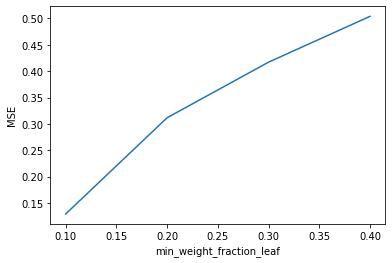

mse_hyper4 : [0.0038435076215822326, 0.004599005517406996, 0.0023485233283244943, 0.003897398673265783, 0.004152009589575576]


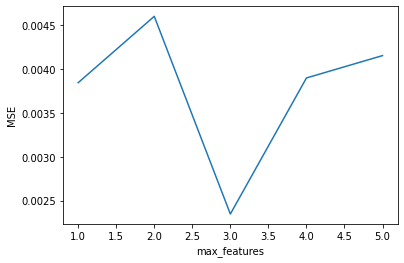

In [ ]:

# varying hyper parameter

Max_depth =[2,3,4,5,8,9,10,11]
mse_hyper0 = []
for i in range(len(Max_depth)): 
   regressor = DecisionTreeRegressor(max_depth=Max_depth[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper0.append(mean_squared_error(y_test, y_pred))

print("mse_hyper0 :",mse_hyper0)
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.plot(Max_depth,mse_hyper0)
plt.show()

Min_samples_split=[2,3,4,5,6,7]
mse_hyper1 = []
for i in range(len(Min_samples_split)): 
   regressor = DecisionTreeRegressor(min_samples_split=Min_samples_split[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper1.append(mean_squared_error(y_test, y_pred))

print("mse_hyper1 :",mse_hyper1)
plt.xlabel("min_sample_split")
plt.ylabel("MSE")
plt.plot(Min_samples_split,mse_hyper1)
plt.show()




Min_samples_leaf=[1,2,3,4,5,6,7,9,10]
mse_hyper2 = []
for i in range(len(Min_samples_leaf)): 
   regressor = DecisionTreeRegressor(min_samples_leaf=Min_samples_leaf[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper2.append(mean_squared_error(y_test, y_pred))

print("mse_hyper2 :",mse_hyper2)
plt.xlabel("min_sample_leaf")
plt.ylabel("MSE")
plt.plot(Min_samples_leaf,mse_hyper2)
plt.show()


Min_weight_fraction_leaf=[0.1,0.2,0.3,0.4]
mse_hyper3 = []
for i in range(len(Min_weight_fraction_leaf)): 
   regressor = DecisionTreeRegressor(min_weight_fraction_leaf=Min_weight_fraction_leaf[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper3.append(mean_squared_error(y_test, y_pred))

print("mse_hyper3 :",mse_hyper3)
plt.xlabel("min_weight_fraction_leaf")
plt.ylabel("MSE")
plt.plot(Min_weight_fraction_leaf,mse_hyper3)
plt.show()


Max_features=[1,2,3,4,5]
mse_hyper4 = []
for i in range(len(Max_features)): 
   regressor = DecisionTreeRegressor(max_features=Max_features[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper4.append(mean_squared_error(y_test, y_pred))

print("mse_hyper4 :",mse_hyper4)
plt.xlabel("max_features")
plt.ylabel("MSE")
plt.plot(Max_features,mse_hyper4)
plt.show()



# **2). RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(" The mean_squared_error for Random Forest Regressor is -->",mean_squared_error(y_test, y_pred))

 The mean_squared_error for Random Forest Regressor is --> 0.001628872128366855


mse_hyper0 : [0.0675506200139246, 0.012613154429506335, 0.0036976015484835915, 0.001916882505842214, 0.0015016439407957484, 0.0014630077007227154, 0.001550468349364787, 0.001616796314860924]


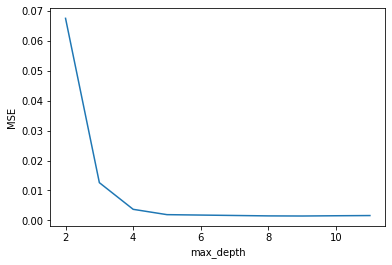

mse_hyper1 : [0.002258379371041173, 0.0015265239883486038, 0.0015345165777427446, 0.0014587635019329044, 0.0013669100224920267]


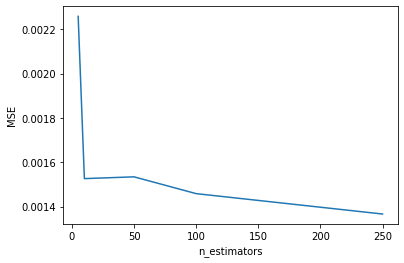

mse_hyper2 : [0.00140342559228038, 0.0014799834597389323, 0.001801266865247581, 0.0021160417808260075, 0.002599319880666881, 0.00359577960674444, 0.00527034248788655, 0.007293995394748106, 0.008222525886508092]


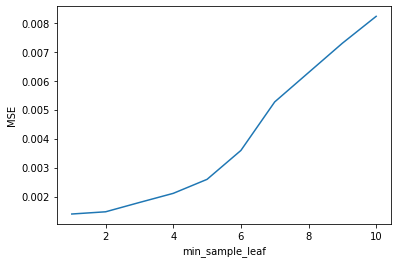

mse_hyper1 : [0.001535500775632499, 0.0015738169453737311, 0.0015449002747937198, 0.0017380084740596, 0.0016829868270693848, 0.0019049886043067345]


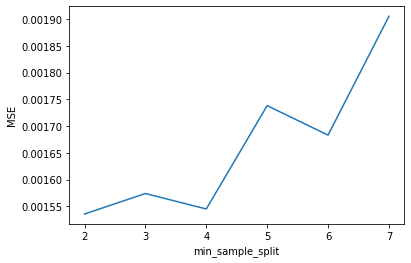

mse_hyper4 : [0.0026040596608565623, 0.0017091162670813344, 0.0015654078449722523, 0.0015116567515732178, 0.0015347147607789873]


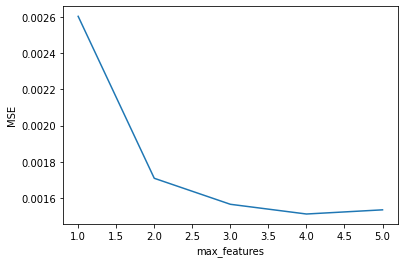

mse_hyper4 : [0.0015597889964035759, 0.001530391664938529]


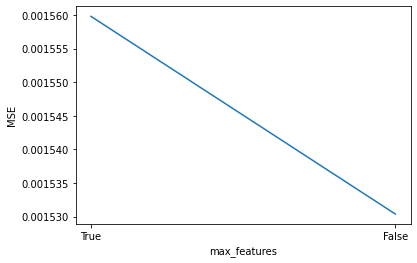

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# varying hyper parameter

Max_depth =[2,3,4,5,8,9,10,11]
mse_hyper0 = []
for i in range(len(Max_depth)): 
   regressor = RandomForestRegressor(max_depth = Max_depth[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper0.append(mean_squared_error(y_test, y_pred))

print("mse_hyper0 :",mse_hyper0)
plt.xlabel("max_depth")
plt.ylabel("MSE")
plt.plot(Max_depth,mse_hyper0)
plt.show()

N_estimator = [5,10,50,100,250]
mse_hyper1 = []
for i in range(len(N_estimator)): 
   regressor = RandomForestRegressor(n_estimators=N_estimator[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper1.append(mean_squared_error(y_test, y_pred))

print("mse_hyper1 :",mse_hyper1)
plt.xlabel("n_estimators")
plt.ylabel("MSE")
plt.plot(N_estimator,mse_hyper1)
plt.show()




Min_samples_leaf=[1,2,3,4,5,6,7,9,10]
mse_hyper2 = []
for i in range(len(Min_samples_leaf)): 
   regressor = RandomForestRegressor(min_samples_leaf=Min_samples_leaf[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper2.append(mean_squared_error(y_test, y_pred))

print("mse_hyper2 :",mse_hyper2)
plt.xlabel("min_sample_leaf")
plt.ylabel("MSE")
plt.plot(Min_samples_leaf,mse_hyper2)
plt.show()


Min_samples_split=[2,3,4,5,6,7]
mse_hyper1 = []
for i in range(len(Min_samples_split)): 
   regressor = RandomForestRegressor(min_samples_split=Min_samples_split[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper1.append(mean_squared_error(y_test, y_pred))

print("mse_hyper1 :",mse_hyper1)
plt.xlabel("min_sample_split")
plt.ylabel("MSE")
plt.plot(Min_samples_split,mse_hyper1)
plt.show()



Max_features=[1,2,3,4,5]
mse_hyper4 = []
for i in range(len(Max_features)): 
   regressor = RandomForestRegressor(max_features=Max_features[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper4.append(mean_squared_error(y_test, y_pred))

print("mse_hyper4 :",mse_hyper4)
plt.xlabel("max_features")
plt.ylabel("MSE")
plt.plot(Max_features,mse_hyper4)
plt.show()


Bootstrap =['True' , 'False']
mse_hyper4 = []
for i in range(2): 
   regressor = RandomForestRegressor(bootstrap=Bootstrap[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper4.append(mean_squared_error(y_test, y_pred))

print("mse_hyper4 :",mse_hyper4)
plt.xlabel("max_features")
plt.ylabel("MSE")
plt.plot(Bootstrap,mse_hyper4)
plt.show()



# **3. AdaBoostRegressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(" The mean_squared_error for Ada Boost Regressor is -->",mean_squared_error(y_test, y_pred))

 The mean_squared_error for Ada Boost Regressor is --> 0.013640741069880159


mse_hyper1 : [0.010600333326620871, 0.012988641871271463, 0.015125505740559169, 0.012313006540842431, 0.009365423212207869]


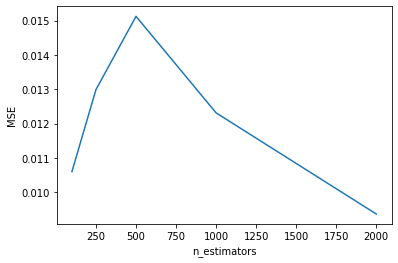

mse_hyper2 : [0.01964952738898932, 0.01742995007932964, 0.009417423389814671]


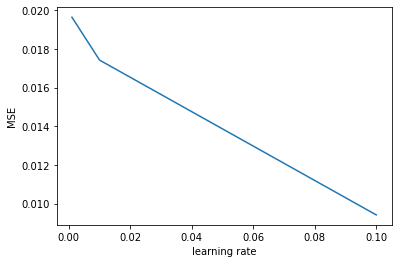

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# varying hyper parameter

N_estimator =[100,250,500,1000,2000]
mse_hyper1 = []
for i in range(len(N_estimator)): 
   regressor = AdaBoostRegressor(n_estimators=N_estimator[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper1.append(mean_squared_error(y_test, y_pred))

print("mse_hyper1 :",mse_hyper1)
plt.xlabel("n_estimators")
plt.ylabel("MSE")
plt.plot(N_estimator,mse_hyper1)
plt.show()




learning_rate=[0.001, 0.01, 0.1]
mse_hyper2 = []
for i in range(len(learning_rate)): 
   regressor = AdaBoostRegressor(learning_rate=learning_rate[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper2.append(mean_squared_error(y_test, y_pred))

print("mse_hyper2 :",mse_hyper2)
plt.xlabel("learning rate")
plt.ylabel("MSE")
plt.plot(learning_rate,mse_hyper2)
plt.show()






# **4) LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(" The mean_squared_error for Linear Regressor is -->",mean_squared_error(y_test, y_pred))

 The mean_squared_error for Linear Regressor is --> 0.0006486416067406132


# **5) KNeighborsRegressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print(" The mean_squared_error for KNeighborsRegressor is -->",mean_squared_error(y_test, y_pred))

 The mean_squared_error for KNeighborsRegressor is --> 0.004634361419203402


mse_hyper1 : [0.003938337314564823, 0.004634361419203402, 0.004820757982066793, 0.005009766970619314, 0.005687988883091778, 0.005825698961197717, 0.006547850961164709]


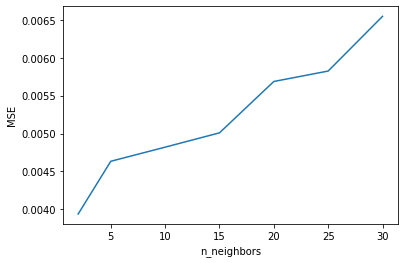

In [ ]:

n_neighbors = [2, 5, 10, 15, 20, 25, 30]
mse_hyper1 = []
for i in range(len(n_neighbors)): 
   regressor = KNeighborsRegressor(n_neighbors=n_neighbors[i])
   regressor.fit(x_train, y_train)
   y_pred = regressor.predict(x_test)
   mse_hyper1.append(mean_squared_error(y_test, y_pred))

print("mse_hyper1 :",mse_hyper1)
plt.xlabel("n_neighbors")
plt.ylabel("MSE")
plt.plot(n_neighbors,mse_hyper1)
plt.show()




# **Hyper Tuning**

In [ ]:
l =[]


regressor = DecisionTreeRegressor(max_depth = 10 , min_samples_leaf=2, min_samples_split=3, max_features = 3, min_weight_fraction_leaf =0.1 )
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
l.append(mean_squared_error(y_test, y_pred))


regressor = RandomForestRegressor(max_depth = 10 , n_estimators = 50, min_samples_leaf=1, min_samples_split=2, max_features = 5, bootstrap = True )
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
l.append(mean_squared_error(y_test, y_pred))

regressor = AdaBoostRegressor(n_estimators = 250 , learning_rate=0.1)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
l.append(mean_squared_error(y_test, y_pred))


regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
l.append(mean_squared_error(y_test, y_pred))

regressor = KNeighborsRegressor(n_neighbors = 2)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
l.append(mean_squared_error(y_test, y_pred))

In [ ]:
l

[0.10392068792329381,
 0.0017210892646876788,
 0.014899009499279232,
 0.0006486416067406132,
 0.003938337314564823]

In [ ]:
model = ['DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'LinearRegressor', 'KNeighborsRegressor']


In [ ]:
li = [model, l]
li

[['DecisionTreeRegressor',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'LinearRegressor',
  'KNeighborsRegressor'],
 [0.10392068792329381,
  0.0017210892646876788,
  0.014899009499279232,
  0.0006486416067406132,
  0.003938337314564823]]

# **Table**

In [ ]:
from tabulate import tabulate

print(tabulate({"Model": ['DecisionTreeRegressor',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'LinearRegressor',
  'KNeighborsRegressor'],"MSE": [0.10392068792329381,
  0.0017210892646876788,
  0.014899009499279232,
  0.0006486416067406132,
  0.003938337314564823]}, headers="keys", tablefmt="grid"))

+-----------------------+-------------+
| Model                 |         MSE |
+=======================+=============+
| DecisionTreeRegressor | 0.103921    |
+-----------------------+-------------+
| RandomForestRegressor | 0.00172109  |
+-----------------------+-------------+
| AdaBoostRegressor     | 0.014899    |
+-----------------------+-------------+
| LinearRegressor       | 0.000648642 |
+-----------------------+-------------+
| KNeighborsRegressor   | 0.00393834  |
+-----------------------+-------------+
